In [ ]:
import pandas as pd
import os

#### merge the 12 month of sales data into a single csv file


In [ ]:
import pandas as pd

# List of file names
file_names = ['/content/Sales_January_2019.csv', '/content/Sales_February_2019.csv', '/content/Sales_March_2019.csv', '/content/Sales_April_2019.csv', '/content/Sales_May_2019.csv', '/content/Sales_June_2019.csv', '/content/Sales_July_2019.csv', '/content/Sales_August_2019.csv', '/content/Sales_September_2019.csv', '/content/Sales_October_2019.csv', '/content/Sales_November_2019.csv', '/content/Sales_December_2019.csv']

# Load all CSV files into a list of DataFrames
dfs = [pd.read_csv(file) for file in file_names]

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Print the merged DataFrame
print(merged_df)



       Order ID                     Product Quantity Ordered Price Each  \
0        141234                      iPhone                1        700   
1        141235    Lightning Charging Cable                1      14.95   
2        141236            Wired Headphones                2      11.99   
3        141237            27in FHD Monitor                1     149.99   
4        141238            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   319666    Lightning Charging Cable                1      14.95   
186846   319667       AA Batteries (4-pack)                2       3.84   
186847   319668             Vareebadd Phone                1        400   
186848   319669            Wired Headphones                1      11.99   
186849   319670  Bose SoundSport Headphones                1      99.99   

            Order Date                        Purchase Address  
0       01/22/19 21:25         944

In [ ]:
merged_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


clean up the data
drop rows of NAN

In [ ]:
nan_df =merged_df[merged_df.isna().any(axis=1)]
nan_df.head()
merged_df = merged_df.dropna(how ='all')
merged_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


find 'or' and delete it

In [ ]:
merged_df = merged_df[merged_df['Order Date'].str[0:2] != 'Or']


In [ ]:
print(merged_df['Order Date'].head())

0    01/22/19 21:25
1    01/28/19 14:15
2    01/17/19 13:33
3    01/05/19 20:33
4    01/25/19 11:59
Name: Order Date, dtype: object


convert column to corret type

In [ ]:
merged_df["Quantity Ordered"] = pd.to_numeric(merged_df["Quantity Ordered"]) #make int
merged_df["Price Each"] = pd.to_numeric(merged_df["Price Each"]) #make flaot
merged_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


augmant data with additional column
##add month column

In [ ]:
merged_df['Month'] = merged_df['Order Date'].str[0:2]
merged_df['Month'] = merged_df['Month'].astype('int')
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


add a sales column


In [ ]:
merged_df['Sales'] = merged_df["Quantity Ordered"] * merged_df["Price Each"]
merged_df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99


add a city column

In [ ]:
#let use  apply ()
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

merged_df["city"] = merged_df["Purchase Address"].apply(lambda x: f"{get_city(x)}   ({get_state(x)}")

#merged_df.drop(columns='column',inplace=True)
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX


question 1
- What was the best month for sales? How much was earned that month?

In [ ]:
result = merged_df.groupby("Month").sum()
result

<ipython-input-12-85e7affc0021>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = merged_df.groupby("Month").sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


Text(0.5, 0, 'month number')

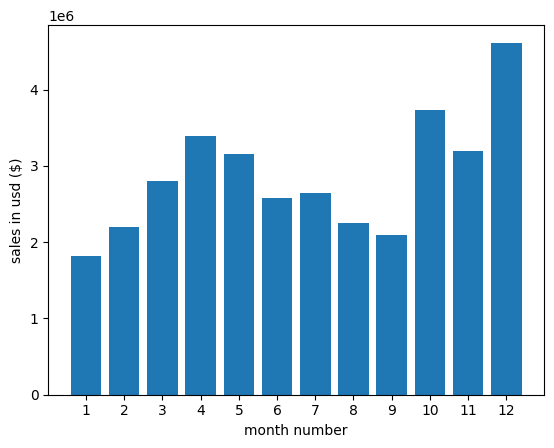

In [ ]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, result["Sales"])
plt.xticks(months)
plt.ylabel('sales in usd ($)')
plt.xlabel('month number')


which city had the highest number of sale

In [ ]:
result = merged_df.groupby("city").sum()
result

<ipython-input-15-aa8192d3c4c0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = merged_df.groupby("city").sum()


,Quantity Ordered,Price Each,Month,Sales
city,,,,
Atlanta (GA,16602,2779908.20,104794,2795498.58
Austin (TX,11153,1809873.61,69829,1819581.75
Boston (MA,22528,3637409.77,141112,3661642.01
Dallas (TX,16730,2752627.82,104620,2767975.40
Los Angeles (CA,33289,5421435.23,208325,5452570.80
New York City (NY,27932,4635370.83,175741,4664317.43
Portland (ME,2750,447189.25,17144,449758.27
Portland (OR,11303,1860558.22,70621,1870732.34
San Francisco (CA,50239,8211461.74,315520,8262203.91


<function matplotlib.pyplot.show(close=None, block=None)>

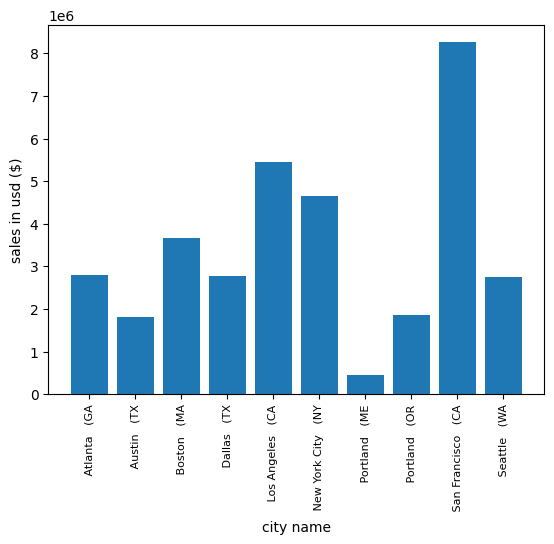

In [ ]:
import matplotlib.pyplot as plt
cities = [city for city,df in merged_df.groupby('city')]
plt.bar(cities, result["Sales"])
plt.xticks(cities,rotation = 'vertical',size = 8  )
plt.ylabel('sales in usd ($)')
plt.xlabel('city name')
plt.show


What time should we display advertisemens to maximize the likelihood of customer’s buying product?


In [ ]:
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'])

In [ ]:
merged_df['Hour'] = merged_df['Order Date'].dt.hour
merged_df['Minute'] = merged_df['Order Date'].dt.minute
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX,11,59


<function matplotlib.pyplot.show(close=None, block=None)>

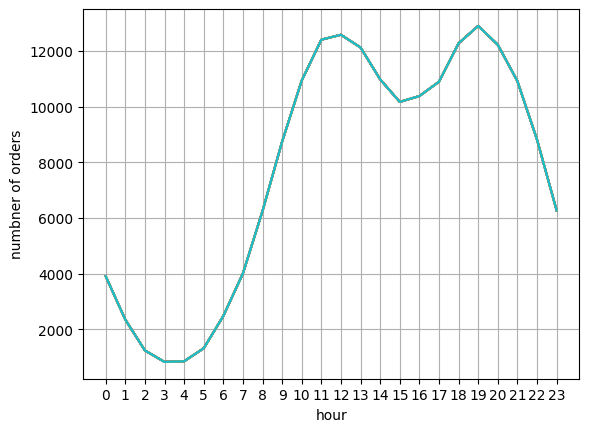

In [ ]:
hours = [hour for hour,df in merged_df.groupby('Hour')]
plt.plot(hours,merged_df.groupby('Hour').count())
#merged_df.groupby('Hour').count()
plt.xticks(hours)
plt.grid()
plt.xlabel('hour')
plt.ylabel('numbner of orders')
plt.show

#my reccomandation is around 11am (11) or 7pm (19)

What products are most often sold together

In [ ]:
Df = merged_df[merged_df["Order ID"].duplicated(keep = False)]
Df["Grouped"] = Df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))
Df = Df[["Order ID","Grouped"]].drop_duplicates()
Df.head(100)


<ipython-input-44-465a4c15637f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df["Grouped"] = Df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))


,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
2206,143326,"Vareebadd Phone,USB-C Charging Cable"
2238,143357,"AAA Batteries (4-pack),27in 4K Gaming Monitor"
2260,143378,"Bose SoundSport Headphones,AA Batteries (4-pack)"
2262,143379,"34in Ultrawide Monitor,Lightning Charging Cable"


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in Df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
  print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


- What product sold the most? Why do you think it sold the most?

<ipython-input-47-f5a4e0e0764c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_order = product_group.sum()['Quantity Ordered']


([<matplotlib.axis.XTick at 0x7a828f02a3e0>,
 [Text(0.0, 0, '20in Monitor'),
  Text(1.0, 0, '27in 4K Gaming Monitor'),
  Text(2.0, 0, '27in FHD Monitor'),
  Text(3.0, 0, '34in Ultrawide Monitor'),
  Text(4.0, 0, 'AA Batteries (4-pack)'),
  Text(5.0, 0, 'AAA Batteries (4-pack)'),
  Text(6.0, 0, 'Apple Airpods Headphones'),
  Text(7.0, 0, 'Bose SoundSport Headphones'),
  Text(8.0, 0, 'Flatscreen TV'),
  Text(9.0, 0, 'Google Phone'),
  Text(10.0, 0, 'LG Dryer'),
  Text(11.0, 0, 'LG Washing Machine'),
  Text(12.0, 0, 'Lightning Charging Cable'),
  Text(13.0, 0, 'Macbook Pro Laptop'),
  Text(14.0, 0, 'ThinkPad Laptop'),
  Text(15.0, 0, 'USB-C Charging Cable'),
  Text(16.0, 0, 'Vareebadd Phone'),
  Text(17.0, 0, 'Wired Headphones'),
  Text(18.0, 0, 'iPhone')])

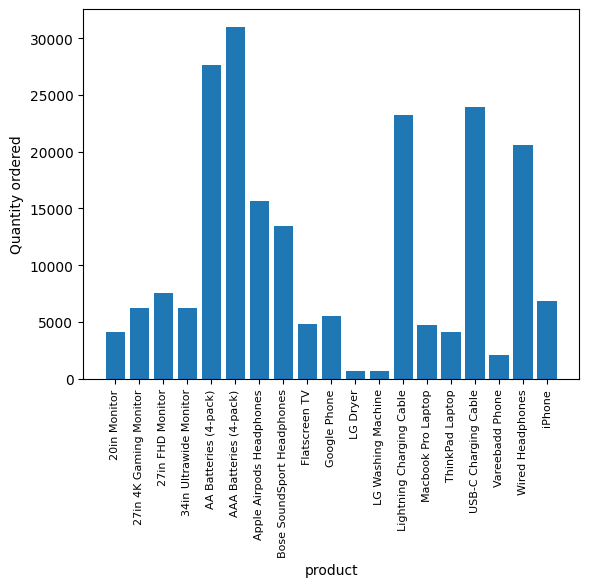

In [ ]:
product_group = merged_df.groupby('Product')
quantity_order = product_group.sum()['Quantity Ordered']
products = [product for product,df in product_group]
plt.bar(products,quantity_order)
plt.ylabel("Quantity ordered")
plt.xlabel('product')
plt.xticks(products,rotation= "vertical",size = 8)

<ipython-input-55-669287cb7353>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = merged_df.groupby("Product").mean()["Price Each"]
<ipython-input-55-669287cb7353>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation = "vertical", size = 8 )


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


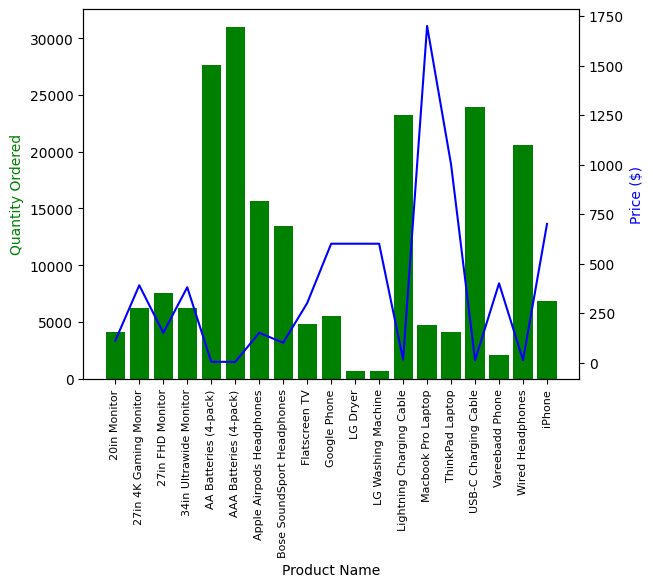

In [ ]:
prices = merged_df.groupby("Product").mean()["Price Each"]
print(prices)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_order, color = "g")
ax2.plot(products,prices,"b-")

ax1.set_xlabel('Product Name')
ax1.set_ylabel("Quantity Ordered", color = "g")
ax2.set_ylabel("Price ($)", color = "b")
ax1.set_xticklabels(products,rotation = "vertical", size = 8 )
plt.show()